In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('comprar_alquilar.csv')
df.head()

ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0      6000            1000           0           600    50000    400000   
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   

   estado_civil  hijos  trabajo  comprar  
0             0      2        2        1  
1             1      3        6        0  
2             2      1        8        1  
3             0      0        3        0  
4             0      0        3        1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [4]:
df['trabajo'] = df['trabajo'].map({0: 'sin empleo',
                                   1: 'freelancer',
                                   2: 'empleado',
                                   3:'empresario',
                                   4: 'pareja (autonomo)',
                                 5: 'pareja(empleados)',
                                   6: 'pareja(autonomo y asalarido)',
                                 7: 'pareja(empresario y autonomo)',
                                   8: 'pareja(otro)'})

In [5]:
df.head()

ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0      6000            1000           0           600    50000    400000   
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   

   estado_civil  hijos                       trabajo  comprar  
0             0      2                      empleado        1  
1             1      3  pareja(autonomo y asalarido)        0  
2             2      1                  pareja(otro)        1  
3             0      0                    empresario        0  
4             0      0                    empresario        1

In [6]:
df['estado_civil'] = df['estado_civil'].map({0: 'soltero', 1: 'casado', 2:'divorciado'})

In [7]:
df['gastos'] = df['gastos_comunes'] + df['gastos_otros'] + df['pago_coche']
df['financiar'] = df['vivienda'] - df['ahorros']

df.drop(columns = ['gastos_comunes', 'gastos_otros','pago_coche','vivienda', 'ahorros'], inplace = True)

In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

ingresos  hijos  comprar  gastos  financiar
count    202.00 202.00   202.00  202.00     202.00
mean    4959.00   1.23     0.33 1698.75  334599.97
std     1682.86   1.37     0.47  324.84  126607.10
min     2008.00   0.00     0.00 1007.00  154716.00
25%     3513.75   0.00     0.00 1430.50  240410.25
50%     4947.50   1.00     0.00 1669.50  301177.00
75%     6374.50   2.00     1.00 1928.00  393413.00
max     7984.00   4.00     1.00 2543.00  618621.00

In [9]:
X = df.drop(columns = ['comprar'])
y = df['comprar']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [12]:
#Llamemos el script de preprocesamiento
import os

In [13]:
os.getcwd()

'C:\\Users\\jeanp\\Notebooks\\06. Aprendizaje Supervisado\\04. Naive Bayes'

In [14]:
os.chdir('..')

In [15]:
os.getcwd()

'C:\\Users\\jeanp\\Notebooks\\06. Aprendizaje Supervisado'

In [16]:
from src.preprocessing import preprocessing

In [17]:
X_train_df, X_test_df = preprocessing(X_train, X_test, scale_nums = False)

C:\Users\jeanp\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
X_train_df.head()

estado_civil_casado  estado_civil_divorciado  estado_civil_soltero  \
33                  0.00                     0.00                  1.00   
45                  1.00                     0.00                  0.00   
90                  0.00                     0.00                  1.00   
185                 1.00                     0.00                  0.00   
200                 1.00                     0.00                  0.00   

     trabajo_empleado  trabajo_empresario  trabajo_freelancer  \
33               0.00                0.00                0.00   
45               0.00                0.00                0.00   
90               0.00                0.00                0.00   
185              0.00                0.00                0.00   
200              0.00                0.00                0.00   

     trabajo_pareja autonomo)  trabajo_parejaautonomo y asalarido)  \
33                       0.00                                 0.00   
45                       1.00                                 0.00   
90                       0.00                                 0.00   
185                      0.00                                 0.00   
200                      0.00                                 0.00   

     trabajo_parejaempleados)  trabajo_parejaempresario y autonomo)  \
33                       0.00                                  0.00   
45                       0.00                                  0.00   
90                       0.00                                  0.00   
185                      1.00                                  0.00   
200                      1.00                                  0.00   

     trabajo_parejaotro)  trabajo_sin empleo  ingresos  hijos  gastos  \
33                  0.00                1.00   5458.00   0.00 1539.00   
45                  0.00                0.00   5515.00   0.00 1396.00   
90                  0.00                1.00   2828.00   0.00 1702.00   
185                 0.00                0.00   4025.00   4.00 1894.00   
200                 0.00                0.00   3334.00   2.00 1888.00   

     financiar  
33   457298.00  
45   236687.00  
90   357397.00  
185  187089.00  
200  356907.00

In [19]:
#Vamos ahora a instanciar y entrenar el modelo:
from sklearn.naive_bayes import GaussianNB

In [20]:
model = GaussianNB()
model.fit(X_train_df, y_train)

GaussianNB()

In [22]:
y_pred = model.predict(X_test_df)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84        39
           1       0.76      0.59      0.67        22

    accuracy                           0.79        61
   macro avg       0.78      0.74      0.76        61
weighted avg       0.78      0.79      0.78        61



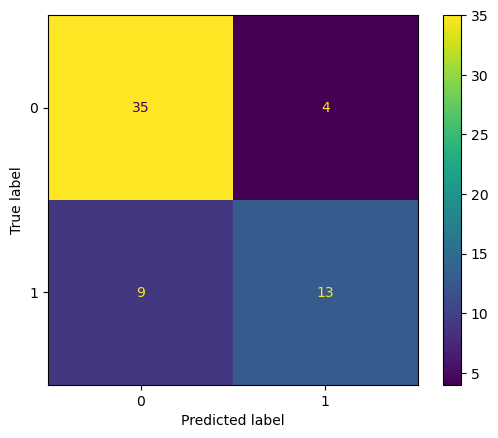

In [26]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [27]:
from sklearn.model_selection import cross_val_score

In [34]:
cross_val_score(estimator = model, X =X_train_df, y = y_train, cv = 4, scoring = 'accuracy').mean()

0.8869047619047619

In [35]:
cross_val_score(estimator = model, X =X_test_df, y = y_test, cv = 4, scoring = 'accuracy').mean()

0.8208333333333334

In [39]:
#Veamos como podemos utilizar XAI (Explicative AI) para entender mejor la predictibilidad del modelo
from lime import lime_tabular

In [40]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train_df), 
                                              mode = 'classification',
                                              class_names = ['alquila','compra'],
                                              feature_names = X_train_df.columns)

In [44]:
X[X.index == 2]

ingresos estado_civil  hijos       trabajo  gastos  financiar
2      6455   divorciado      1  pareja(otro)    1926     264316

In [45]:
os.getcwd()

'C:\\Users\\jeanp\\Notebooks\\06. Aprendizaje Supervisado'

In [46]:
import pickle

In [47]:
col_transformer = pickle.load(open('col_transformer','rb'))

In [48]:
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000242B7C47FA0>)])

In [56]:
X_nueva = pd.DataFrame(col_transformer.transform(X[X.index == 16]), columns = X_train_df.columns)
X_nueva

estado_civil_casado  estado_civil_divorciado  estado_civil_soltero  \
0                 1.00                     0.00                  0.00   

   trabajo_empleado  trabajo_empresario  trabajo_freelancer  \
0              0.00                0.00                0.00   

   trabajo_pareja autonomo)  trabajo_parejaautonomo y asalarido)  \
0                      0.00                                 0.00   

   trabajo_parejaempleados)  trabajo_parejaempresario y autonomo)  \
0                      0.00                                  0.00   

   trabajo_parejaotro)  trabajo_sin empleo  ingresos  hijos  gastos  financiar  
0                 1.00                0.00   5685.00   2.00 1363.00  298862.00

In [57]:
explicacion = explainer.explain_instance(np.array(X_nueva)[0], model.predict_proba, num_features = len(X_train_df.columns))

C:\Users\jeanp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [58]:
explicacion.show_in_notebook()

In [59]:
explicacion.as_list()

[('4885.00 < ingresos <= 6347.00', 0.2165234460368084),
 ('233861.00 < financiar <= 299779.00', 0.12485573417710655),
 ('trabajo_pareja autonomo) <= 0.00', 0.02771088174385238),
 ('gastos <= 1436.00', -0.021205406813061614),
 ('trabajo_sin empleo <= 0.00', -0.013779021711526587),
 ('trabajo_parejaempleados) <= 0.00', -0.010764162936591128),
 ('1.00 < hijos <= 2.00', 0.009467532231929176),
 ('estado_civil_divorciado <= 0.00', -0.009253875529264868),
 ('0.00 < estado_civil_casado <= 1.00', 0.008629404123435835),
 ('trabajo_empresario <= 0.00', 0.00808670863803851),
 ('trabajo_freelancer <= 0.00', 0.00610367703831263),
 ('trabajo_parejaotro) > 0.00', 0.005954771582079593),
 ('trabajo_parejaempresario y autonomo) <= 0.00', -0.004914053083119854),
 ('trabajo_empleado <= 0.00', 0.004105498038177813),
 ('trabajo_parejaautonomo y asalarido) <= 0.00', 0.0031518044745138755),
 ('estado_civil_soltero <= 0.00', 0.002393886863752726)]